##### *Machine Learning for Cybersecurity Project*

## **Cybersecurity Attack Classification**


Juanito M. Ramos II

##### **Background**

Random Forest is a machine learning algorithm that uses many decision trees to make better predictions. Each tree looks at different random parts of the data and their results are combined by voting for classification or averaging for regression which makes it as ensemble learning technique. This helps in improving accuracy and reducing errors.

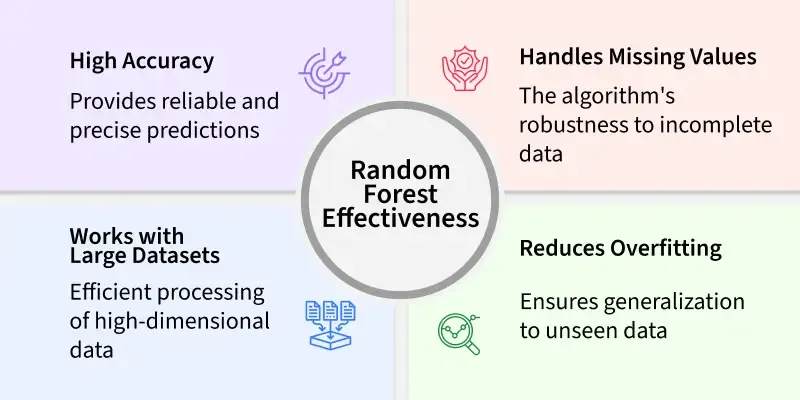

## Working of Random Forest

1. **Create Many Decision Trees**  
   The algorithm builds many decision trees, each using a random portion of the data.  
   This makes every tree slightly different.

2. **Pick Random Features**  
   When building each tree, it doesn’t use all features (columns) at once.  
   Instead, it picks a few at random to decide how to split the data.  
   This keeps the trees diverse and prevents overfitting.

3. **Each Tree Makes a Prediction**  
   Every tree gives its own prediction based on what it learned from its part of the data.

4. **Combine the Predictions**  
   - **For Classification:** The final result is chosen by **majority voting** (the class most trees agree on).  
   - **For Regression:** The final result is the **average** of all tree predictions.

---

## Why It Works Well

- Using random data and features for each tree helps **avoid overfitting**.  
- The ensemble of different trees makes predictions **more accurate and reliable**.

---

## Key Features of Random Forest

- **Handles Missing Data:**  
  Works even when some data is missing — no need to fill all gaps manually.

- **Shows Feature Importance:**  
  Identifies which features are most useful for making predictions, helping in data understanding.

- **Works Well with Big and Complex Data:**  
  Can handle large datasets with many features efficiently without losing accuracy.

- **Used for Different Tasks:**  
  Suitable for both:
  - **Classification** → predicting categories or labels  
  - **Regression** → predicting continuous values or amounts

---

## Assumptions of Random Forest

1. **Each Tree Makes Its Own Decisions:**  
   Every tree independently makes predictions.

2. **Random Parts of the Data Are Used:**  
   Trees are built using random samples and features to reduce bias and variance.

3. **Enough Data Is Needed:**  
   Having sufficient data ensures trees learn diverse and unique patterns.

4. **Different Predictions Improve Accuracy:**  
   Combining multiple tree predictions results in a more accurate and stable final outcome.

##### **Dataset**

##### *Import necessary libraries*

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

##### **General Procedures**

##### 1. Load the data

##### *Overview*

In [2]:
warnings.filterwarnings('ignore')  # To ignore any warnings during execution

cyber_attacks_data = pd.read_csv('assets\cyber_attacks.csv')
cyber_attacks_data.head()

<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Juanito\AppData\Local\Temp\ipykernel_21496\151266503.py:3: SyntaxWarning: invalid escape sequence '\c'
  cyber_attacks_data = pd.read_csv('assets\cyber_attacks.csv')


,protocol_type,duration,src_bytes,dst_bytes,num_packets,num_connections,attack_type
0,1,43.418651,1701.411601,201.794741,42,15,Botnet
1,1,8.587924,409.971403,710.745376,17,6,Normal
2,1,4.386891,418.478693,559.457816,17,5,Normal
3,0,NaN,NaN,NaN,11,3,Normal
4,0,1.061892,494.253699,572.459614,11,3,Normal


In [3]:
cyber_attacks_data.info()
num_rows, num_columns = cyber_attacks_data.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   protocol_type    10000 non-null  int64  
 1   duration         9500 non-null   float64
 2   src_bytes        9500 non-null   float64
 3   dst_bytes        9500 non-null   float64
 4   num_packets      10000 non-null  int64  
 5   num_connections  10000 non-null  int64  
 6   attack_type      10000 non-null  object 
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB
Number of Rows: 10000
Number of Columns: 7


##### *Summary Statistics*

In [4]:
cyber_attacks_data_summary = cyber_attacks_data.describe()
cyber_attacks_data_summary

,protocol_type,duration,src_bytes,dst_bytes,num_packets,num_connections
count,10000.000000,9500.000000,9500.000000,9500.000000,10000.000000,10000.000000
mean,0.506100,84.035480,980.541438,1189.719031,93.993200,49.757500
std,0.673653,188.084795,1434.835096,1528.620785,147.278664,94.172701
min,0.000000,0.000871,0.338156,0.019126,2.000000,0.000000
25%,0.000000,4.480702,272.479493,263.080684,14.000000,2.000000
50%,0.000000,7.121187,500.910972,598.294521,19.000000,5.000000
75%,1.000000,59.675633,776.327886,1021.076731,100.000000,20.000000
max,2.000000,1220.385081,8000.795141,7603.412219,582.000000,365.000000


##### *Check Missing Values*

In [5]:
missing_values_count = cyber_attacks_data.isnull().sum()
missing_values_percentage = ((missing_values_count / len(cyber_attacks_data)) * 100).round(2)
#print("Missing values per column:")
#print(missing_values_count)
#print("Percentage of missing values per column:")
#print(missing_values_percentage)


missing_report = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage (%)': missing_values_percentage
})

print(missing_report[missing_values_count > 0])


           Missing Values  Percentage (%)
duration              500             5.0
src_bytes             500             5.0
dst_bytes             500             5.0


##### *Remove Missing Values*

In [6]:
cyber_attacks_data = cyber_attacks_data.dropna() # Removing rows with missing values
missing_report_after = cyber_attacks_data.isnull().sum()
print(missing_report_after[missing_report_after > 0])

Series([], dtype: int64)


##### *Visualizing Class Distribution*

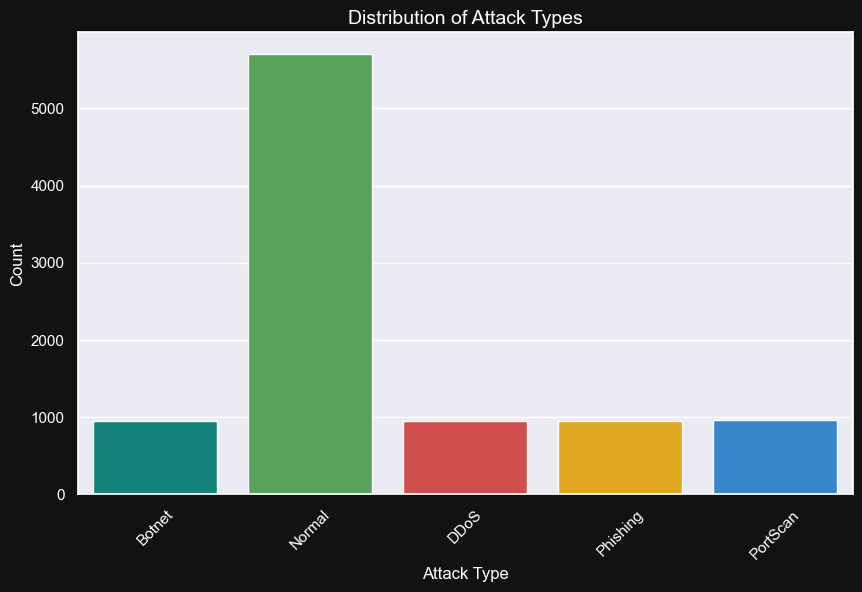

In [7]:

# cybersecurity-inspired color palette
cyber_palette = {
    'DDoS': '#E53935',       # Red - high danger / attack
    'PortScan': '#1E88E5',   # Blue - reconnaissance / scanning
    'Phishing': '#FFB300',   # Yellow-Orange - social engineering
    'Normal': '#4CAF50',     # Green - safe / normal traffic
    'Botnet': '#009688'      # Teal - stealthy / hidden threat
}

plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")

# Apply color mapping=
sns.countplot(
    x='attack_type',
    data=cyber_attacks_data,
    hue='attack_type',
    palette=[cyber_palette.get(a, '#9E9E9E') for a in cyber_attacks_data['attack_type'].unique()],
    legend=False
)

plt.title('Distribution of Attack Types', fontsize=14, color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.xlabel('Attack Type', color='white')
plt.ylabel('Count', color='white')
plt.gcf().set_facecolor('#121212')  # dark background for cyber aesthetic
plt.show()


In [8]:
print(cyber_attacks_data['attack_type'].value_counts(normalize=True))

attack_type
Normal      0.600632
PortScan    0.100421
DDoS        0.100316
Phishing    0.099368
Botnet      0.099263
Name: proportion, dtype: float64


protocol_type
0    5649
1    2880
2     971
Name: count, dtype: int64


<Axes: xlabel='duration', ylabel='Count'>

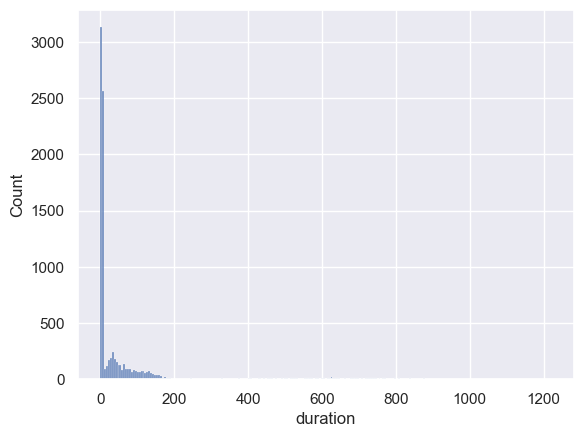

In [9]:
print(cyber_attacks_data['protocol_type'].value_counts())
sns.histplot(cyber_attacks_data['duration'])

##### *Correlation Matrix*

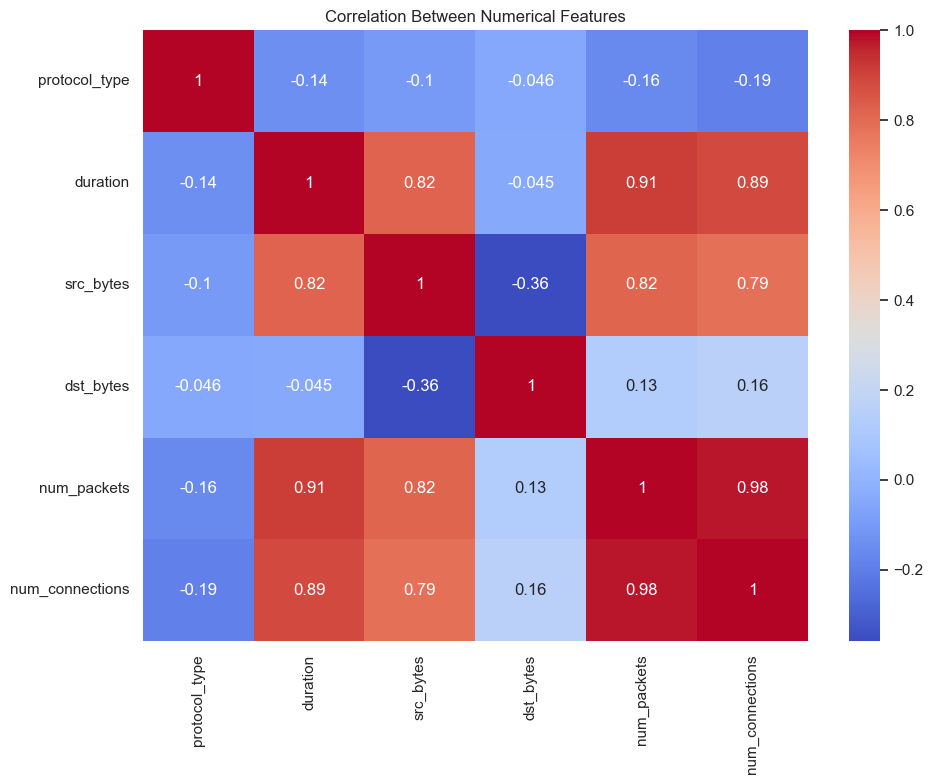

In [10]:
# If protocol_type is categorical (strings), exclude it from correlation analysis
if cyber_attacks_data['protocol_type'].dtype == 'object':
    numeric_features = ['duration', 'src_bytes', 'dst_bytes', 'num_packets', 'num_connections']
    correlation = cyber_attacks_data[numeric_features].corr()
else:
    numeric_features = ['protocol_type', 'duration', 'src_bytes', 'dst_bytes', 'num_packets', 'num_connections']
    correlation = cyber_attacks_data[numeric_features].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.tight_layout()
plt.show()

Note:

1 means a perfect positive correlation (as one variable increases, the other increases).

-1 means a perfect negative correlation (as one variable increases, the other decreases).

0 means no correlation.

##### *Distribution of All Numeric Features*

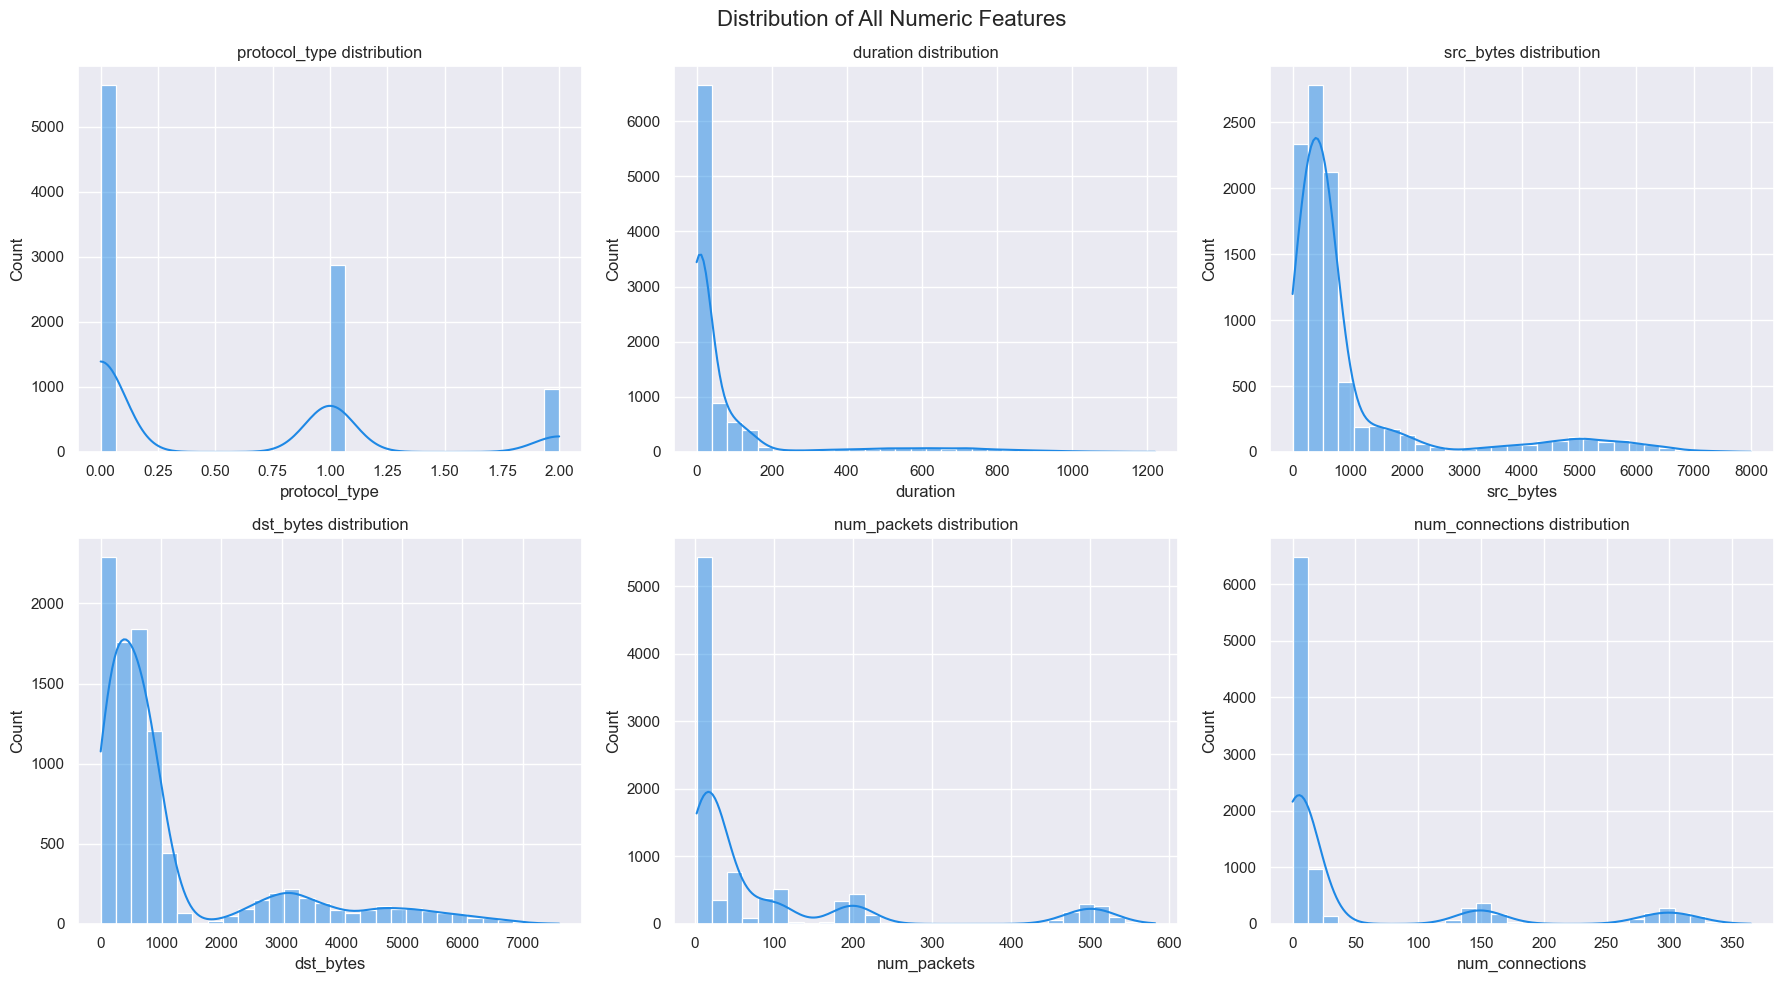

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
for i, feature in enumerate(numeric_features):
    sns.histplot(cyber_attacks_data[feature], bins=30, kde=True, color='#1E88E5', ax=axes[i])
    axes[i].set_title(f'{feature} distribution')

for j in range(len(numeric_features), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribution of All Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()


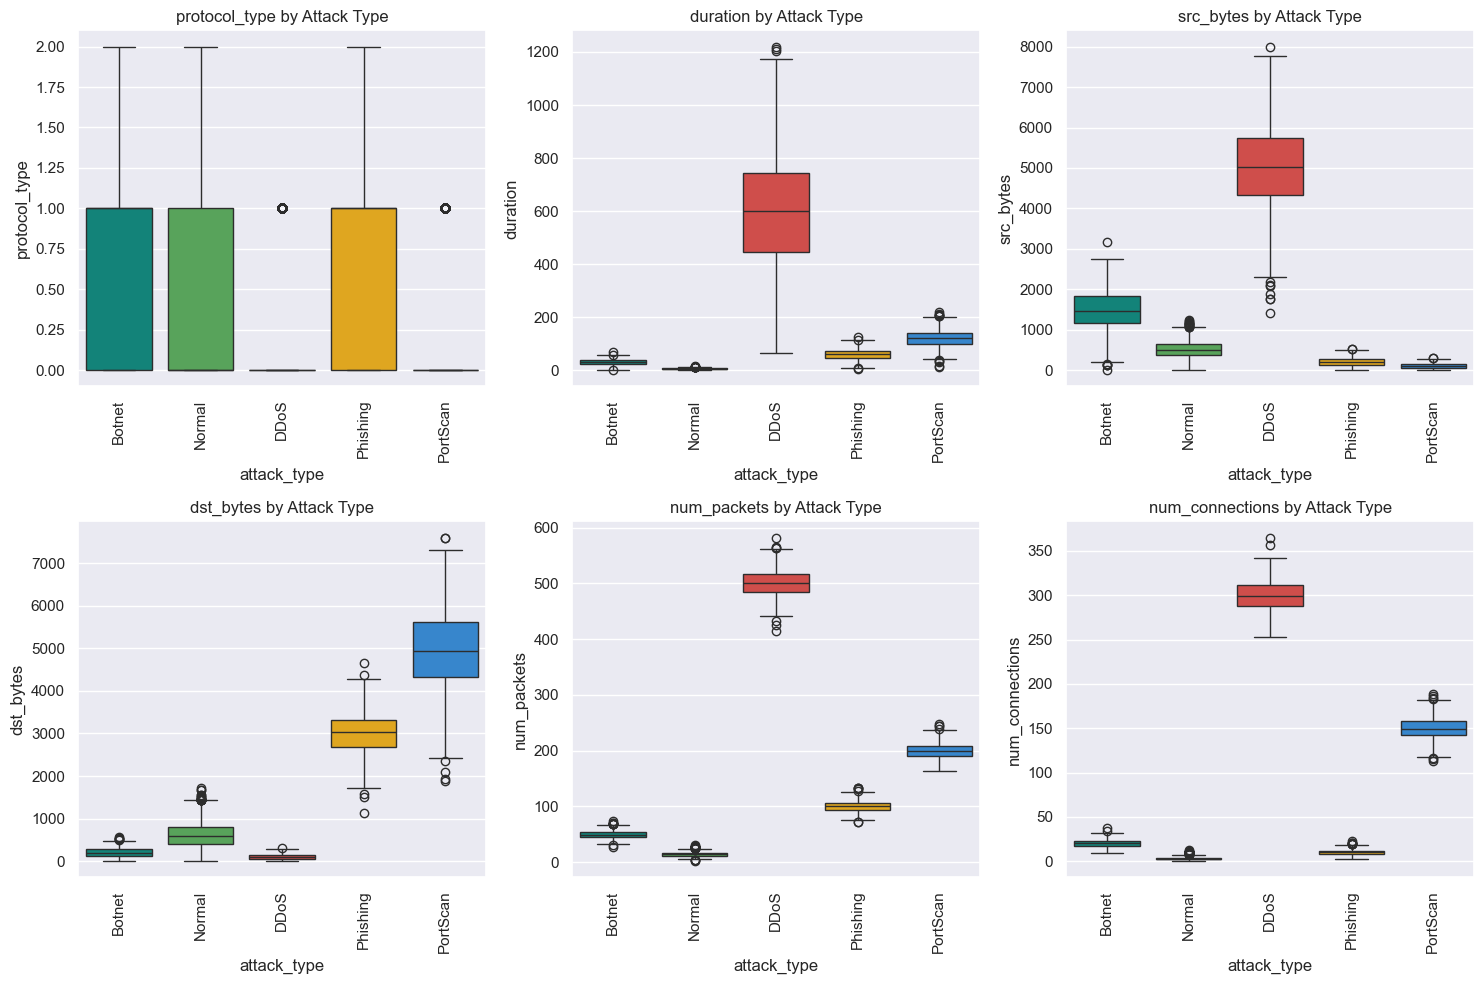

In [12]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='attack_type', y=feature, data=cyber_attacks_data, palette=cyber_palette)
    plt.title(f'{feature} by Attack Type')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


##### *Relationship Between Multiple Variables*

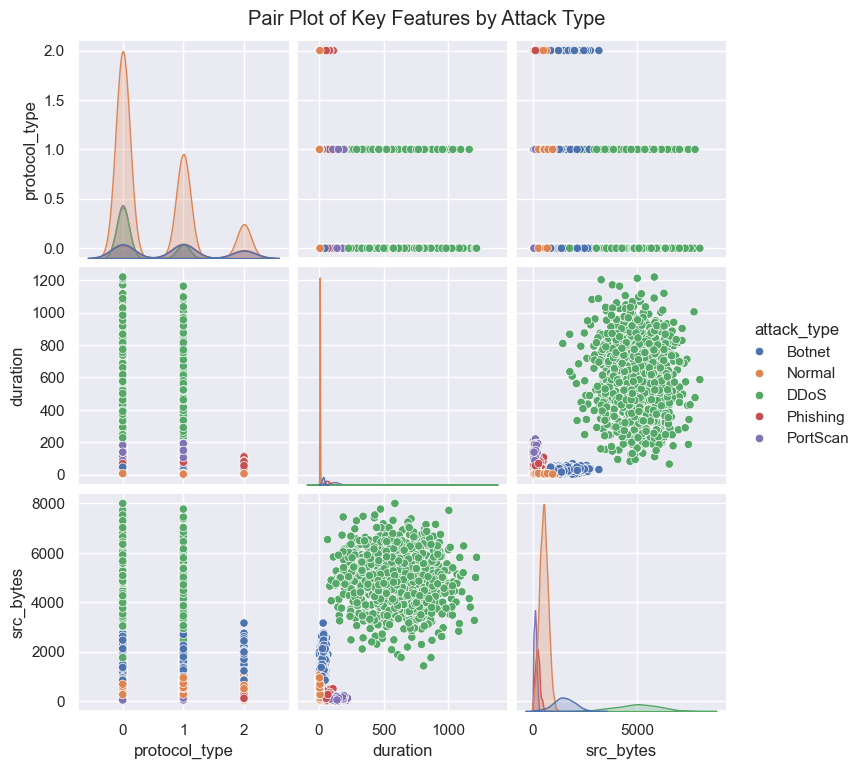

In [13]:
# Enhanced pair plot with log-scaling for skewed features and styling tweaks
plot_features = numeric_features[:3]
plot_df = cyber_attacks_data[plot_features + ['attack_type']].copy()

skewed_features = {'duration': 'Duration (log1p)', 'src_bytes': 'Source Bytes (log1p)'}
pretty_names = {'protocol_type': 'Protocol Type'}
transformed_cols = []

for feature in plot_features:
    if feature in skewed_features:
        log_col = f"{feature}_log1p"
        plot_df[log_col] = np.log1p(plot_df[feature])
        pretty_names[log_col] = skewed_features[feature]
        transformed_cols.append(log_col)
    else:
        transformed_cols.append(feature)
        pretty_names[feature] = feature.replace('_', ' ').title()

plot_df = plot_df[transformed_cols + ['attack_type']].rename(columns={**pretty_names, 'attack_type': 'Attack Type'})

max_samples_per_class = 400
if len(plot_df) > max_samples_per_class * plot_df['Attack Type'].nunique():
    plot_df = plot_df.groupby('Attack Type', group_keys=False).apply(
        lambda df: df.sample(min(len(df), max_samples_per_class), random_state=42)
    ).reset_index(drop=True)

sns.set_theme(style='whitegrid', context='talk')
pair_grid = sns.pairplot(
    plot_df,
    hue='Attack Type',
    corner=True,
    diag_kind='kde',
    height=3.2,
    plot_kws={'alpha': 0.55, 's': 35, 'edgecolor': 'white', 'linewidth': 0.3},
    diag_kws={'fill': True, 'alpha': 0.5},
    palette='Set2'
)
pair_grid.fig.subplots_adjust(top=0.92)
pair_grid.fig.suptitle('Pair Plot of Key Features by Attack Type', y=1.02)
plt.show()

##### 2. Load the data

##### *Encoding Categorical Features*

In [ ]:

# For improving accuracy since this is a categorical type of feature
categorical_features = ['protocol_type']
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

##### *Scaling Categorical Features*

In [18]:
numerical_features = ['duration', 'src_bytes', 'dst_bytes', 'num_packets', 'num_connections']
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

##### *Preprocessing Pipeline*

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])  

##### *Splitting the Dataset*

In [24]:
X = cyber_attacks_data.drop(columns=['attack_type'])
y = cyber_attacks_data['attack_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

##### *Handling Class Imbalance*

In [29]:
# For classification tasks where one clas significantly outnumbers others, stratified splitting ensures that both training and testing sets maintain the same class distribution as the original dataset. This helps in achieving more reliable and generalizable model performance.
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

##### 3. Train a Random Forest Classifier using the preprocessed data to train the model.

##### *With Protocol*

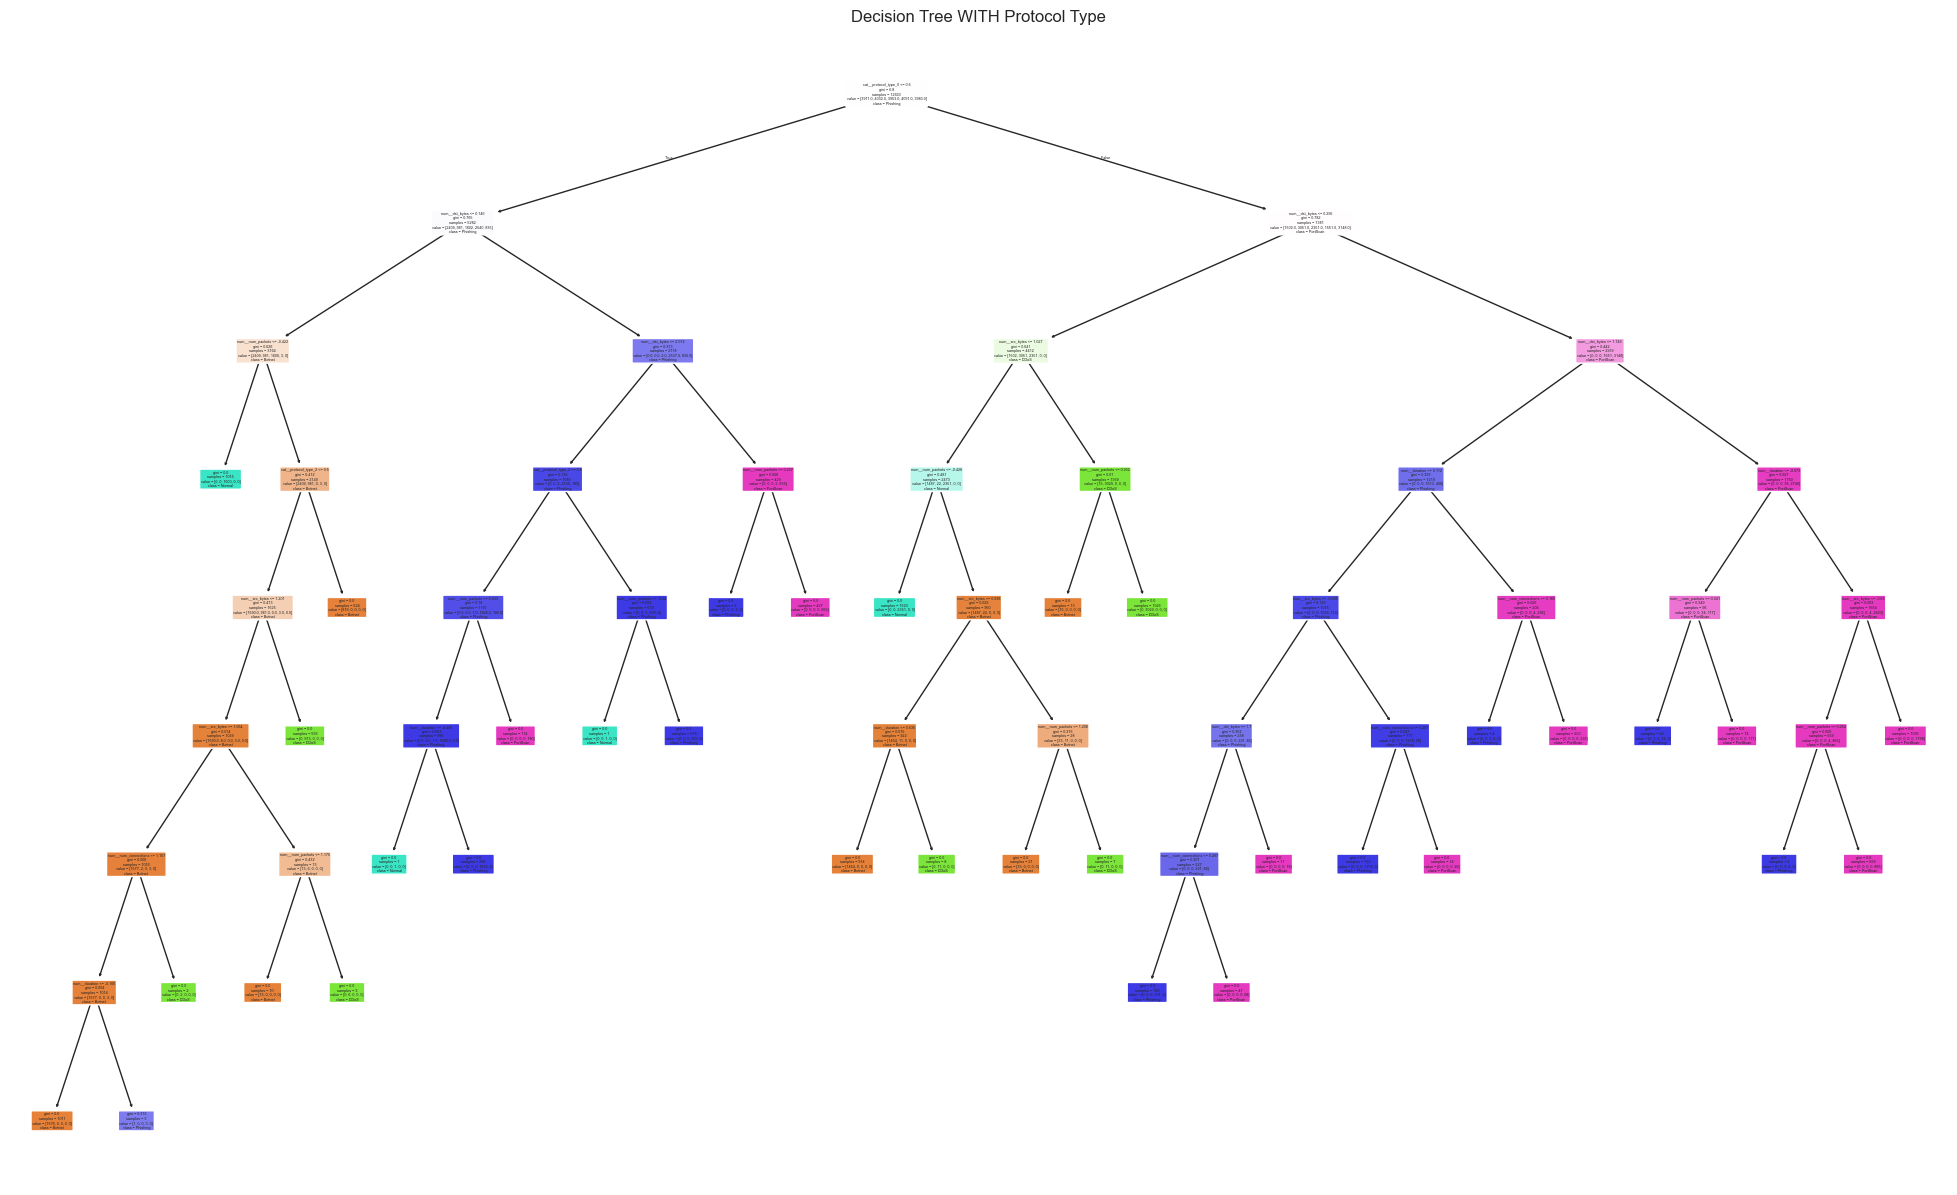

In [33]:
rf_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),  
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        class_weight='balanced',
        random_state=42
    ))
])

# Train with original split
rf_pipeline.fit(X_train, y_train)  # Not using X_train_resampled

# Visualize tree with protocol_type
plt.figure(figsize=(25, 15))
plot_tree(rf_pipeline.named_steps['classifier'].estimators_[0],
          feature_names=rf_pipeline.named_steps['preprocessor'].get_feature_names_out(),
          class_names=rf_pipeline.classes_,
          filled=True,
          rounded=True,) 
plt.title('Decision Tree WITH Protocol Type')
plt.show()

##### *Without Protocol*

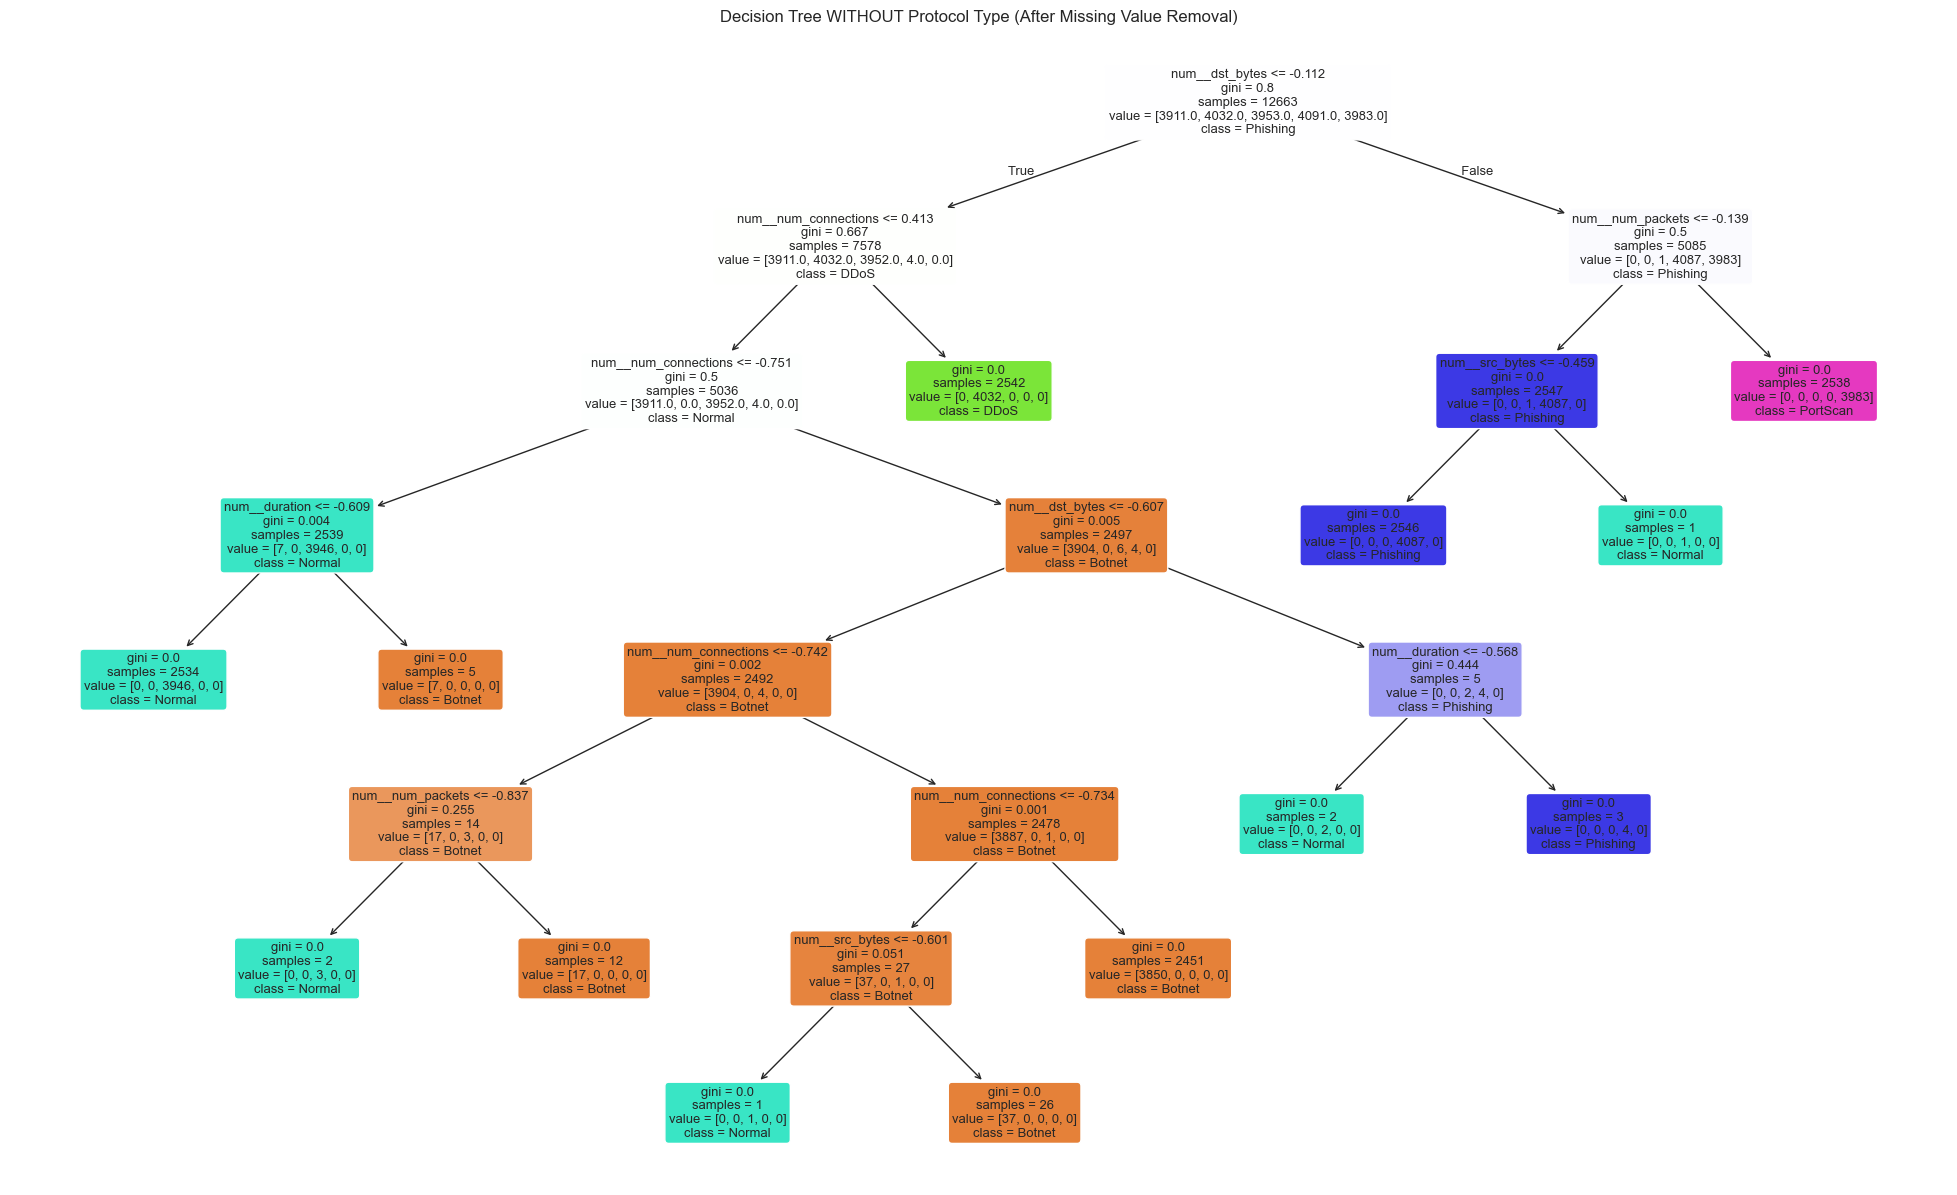

In [34]:
X_train_no_protocol = X_train.drop(columns=['protocol_type'])
smote = SMOTE(random_state=42)
X_train_res_no_protocol, y_train_res_no_protocol = smote.fit_resample(X_train_no_protocol, y_train)

# Define preprocessing WITHOUT protocol_type
preprocessor_without_protocol = ColumnTransformer(
    transformers=[('num', numerical_transformer, numerical_features)]
)

# Train pipeline
rf_pipeline_without_protocol = ImbPipeline([
    ('preprocessor', preprocessor_without_protocol),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        class_weight='balanced',
        random_state=42
    ))
])

# Train on same cleaned/resampled data
rf_pipeline_without_protocol.fit(X_train_res_no_protocol, y_train_res_no_protocol)

# Visualize tree without protocol_type
plt.figure(figsize=(25, 15))
plot_tree(rf_pipeline_without_protocol.named_steps['classifier'].estimators_[0],
          feature_names=preprocessor_without_protocol.get_feature_names_out(),
          class_names=rf_pipeline_without_protocol.classes_,
          filled=True,
          rounded=True)
plt.title('Decision Tree WITHOUT Protocol Type (After Missing Value Removal)')
plt.show()

##### 4. Perform feature importance analysis


#### ***With Protocol***

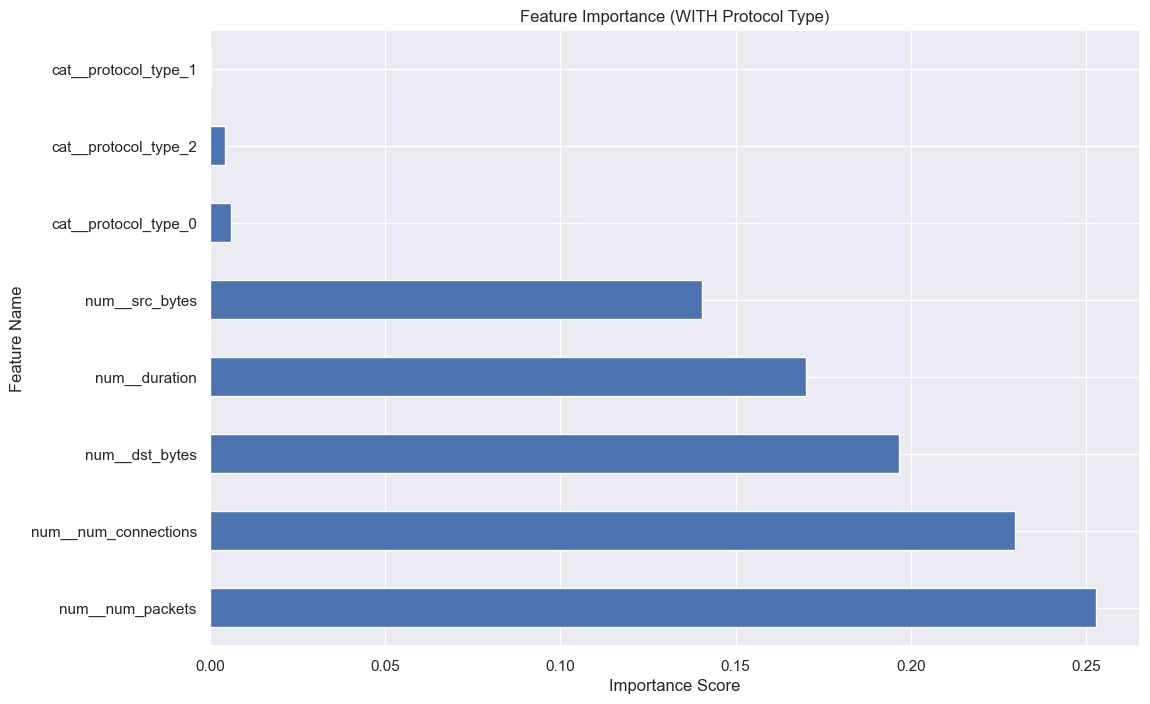

In [35]:
importances = rf_pipeline.named_steps['classifier'].feature_importances_
features = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()

plt.figure(figsize=(12, 8))
pd.Series(importances, index=features).sort_values(ascending=False).head(10).plot.barh()
plt.title('Feature Importance (WITH Protocol Type)')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.show()